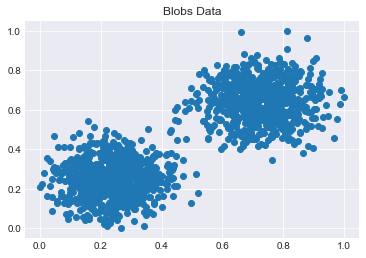

In [5]:
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
plt.style.use("seaborn-darkgrid")

#データセットの準備
X,y = make_blobs(n_samples=1500,n_features=2,centers=2,random_state=3)

#データの正規化
X_norm = MinMaxScaler().fit_transform(X)

#データの分布傾向の可視化
plt.scatter(X_norm[:,0],X_norm[:,1])
plt.title("Blobs Data")
plt.show()

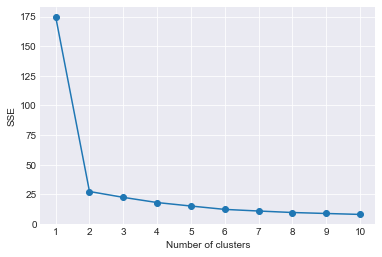

In [6]:
#必要なライブラリのインポート
from sklearn.cluster import KMeans

#クラスタ内誤差平方和を格納するリスト
sse=[]

for i in range(1,11):
    #k-meansの適用
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X_norm)

    #クラスタ内誤差平方和をリストに追加
    sse.append(kmeans.inertia_)

#クラスタリング結果の可視化
plt.ylabel("SSE")
plt.xlabel("Number of clusters")
plt.xticks(range(1,11))
plt.plot(range(1,11),sse,marker="o")
plt.show()

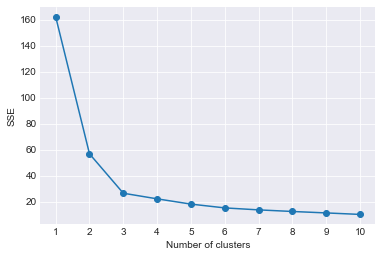

In [7]:
# データセットの準備（クラスタ数を3に設定）
X, y = make_blobs(n_samples=1500, n_features=2, centers=3, random_state=2)

# データの正規化
X_norm = MinMaxScaler().fit_transform(X)

# クラスタ内誤差平方和を格納するリスト
sse = []

for i in range(1, 11):
  # k-meansの適用
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X_norm)
  # クラスタ内誤差平方和をリスト追加
  sse.append(kmeans.inertia_)

# クラスタリング結果の可視化
plt.ylabel('SSE')
plt.xlabel('Number of clusters')
plt.xticks(range(1,11))
plt.plot(range(1,11), sse, marker='o')
plt.show()

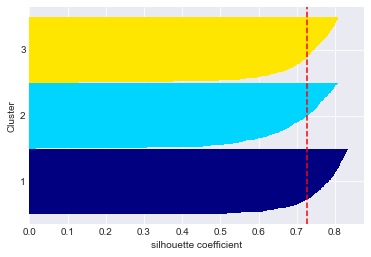

In [8]:
# 必要なライブラリのインポート
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import numpy as np

# データセットの準備
n_clusters = 3
X, y = make_blobs(n_samples=1500, n_features=2, centers=3, random_state=3)

# データの正規化
X_norm = MinMaxScaler().fit_transform(X)

# k-meansの適用
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_norm)

silhouette_vals = silhouette_samples(X_norm, cluster_labels, metric='euclidean')

y_lower = 10
yticks = []


for i in range(n_clusters):
        ith_silhouette_vals = silhouette_vals[cluster_labels==i]
        ith_silhouette_vals.sort()
        
        size_cluster_i = ith_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i                # クラスタごとにサンプル数を足しy軸の上限をセット
        color = cm.jet(float(i)/n_clusters)               # 色の値をセット
        plt.barh(range(y_lower, y_upper),                 # 水平方向の棒グラフを描画（底辺の範囲を指定）
                         ith_silhouette_vals,             # 棒グラフの幅
                         height=1.0,                      # 棒グラフの高さ
                         color=color)                     # 棒グラフの色
        yticks.append((y_lower + y_upper)/2)             # クラスタラベルを表示する位置
        y_lower += len(ith_silhouette_vals)               # 底辺の値に棒グラフの幅を足す

silhouette_avg = silhouette_score(X_norm, cluster_labels) 
plt.axvline(silhouette_avg, color="red", linestyle="--")  # シルエット係数の平均値の箇所に破線を引く 
plt.yticks(yticks, range(1, n_clusters + 1))                  # クラスタラベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()